In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data1 = pd.read_csv(r'F:\python nhom4\data\BTL\data_sach\data2020.csv')
data2 = pd.read_csv(r'F:\python nhom4\data\BTL\data_sach\data2021.csv')
data3 = pd.read_csv(r'F:\python nhom4\data\BTL\data_sach\data2022.csv')
data4 = pd.read_csv(r'F:\python nhom4\data\BTL\data_sach\data2023.csv')
data5 = pd.read_csv(r'F:\python nhom4\data\BTL\data_sach\data2024.csv')
data_all = (
    pd.concat([data1, data2, data3, data4, data5], ignore_index= True)
)

Tương quan giữa các môn thi

In [7]:
data_all['year'] = data_all['year'].astype(str)
data_all['year'].unique()

array(['2020', '2021', '2022', '2023', '2024'], dtype=object)

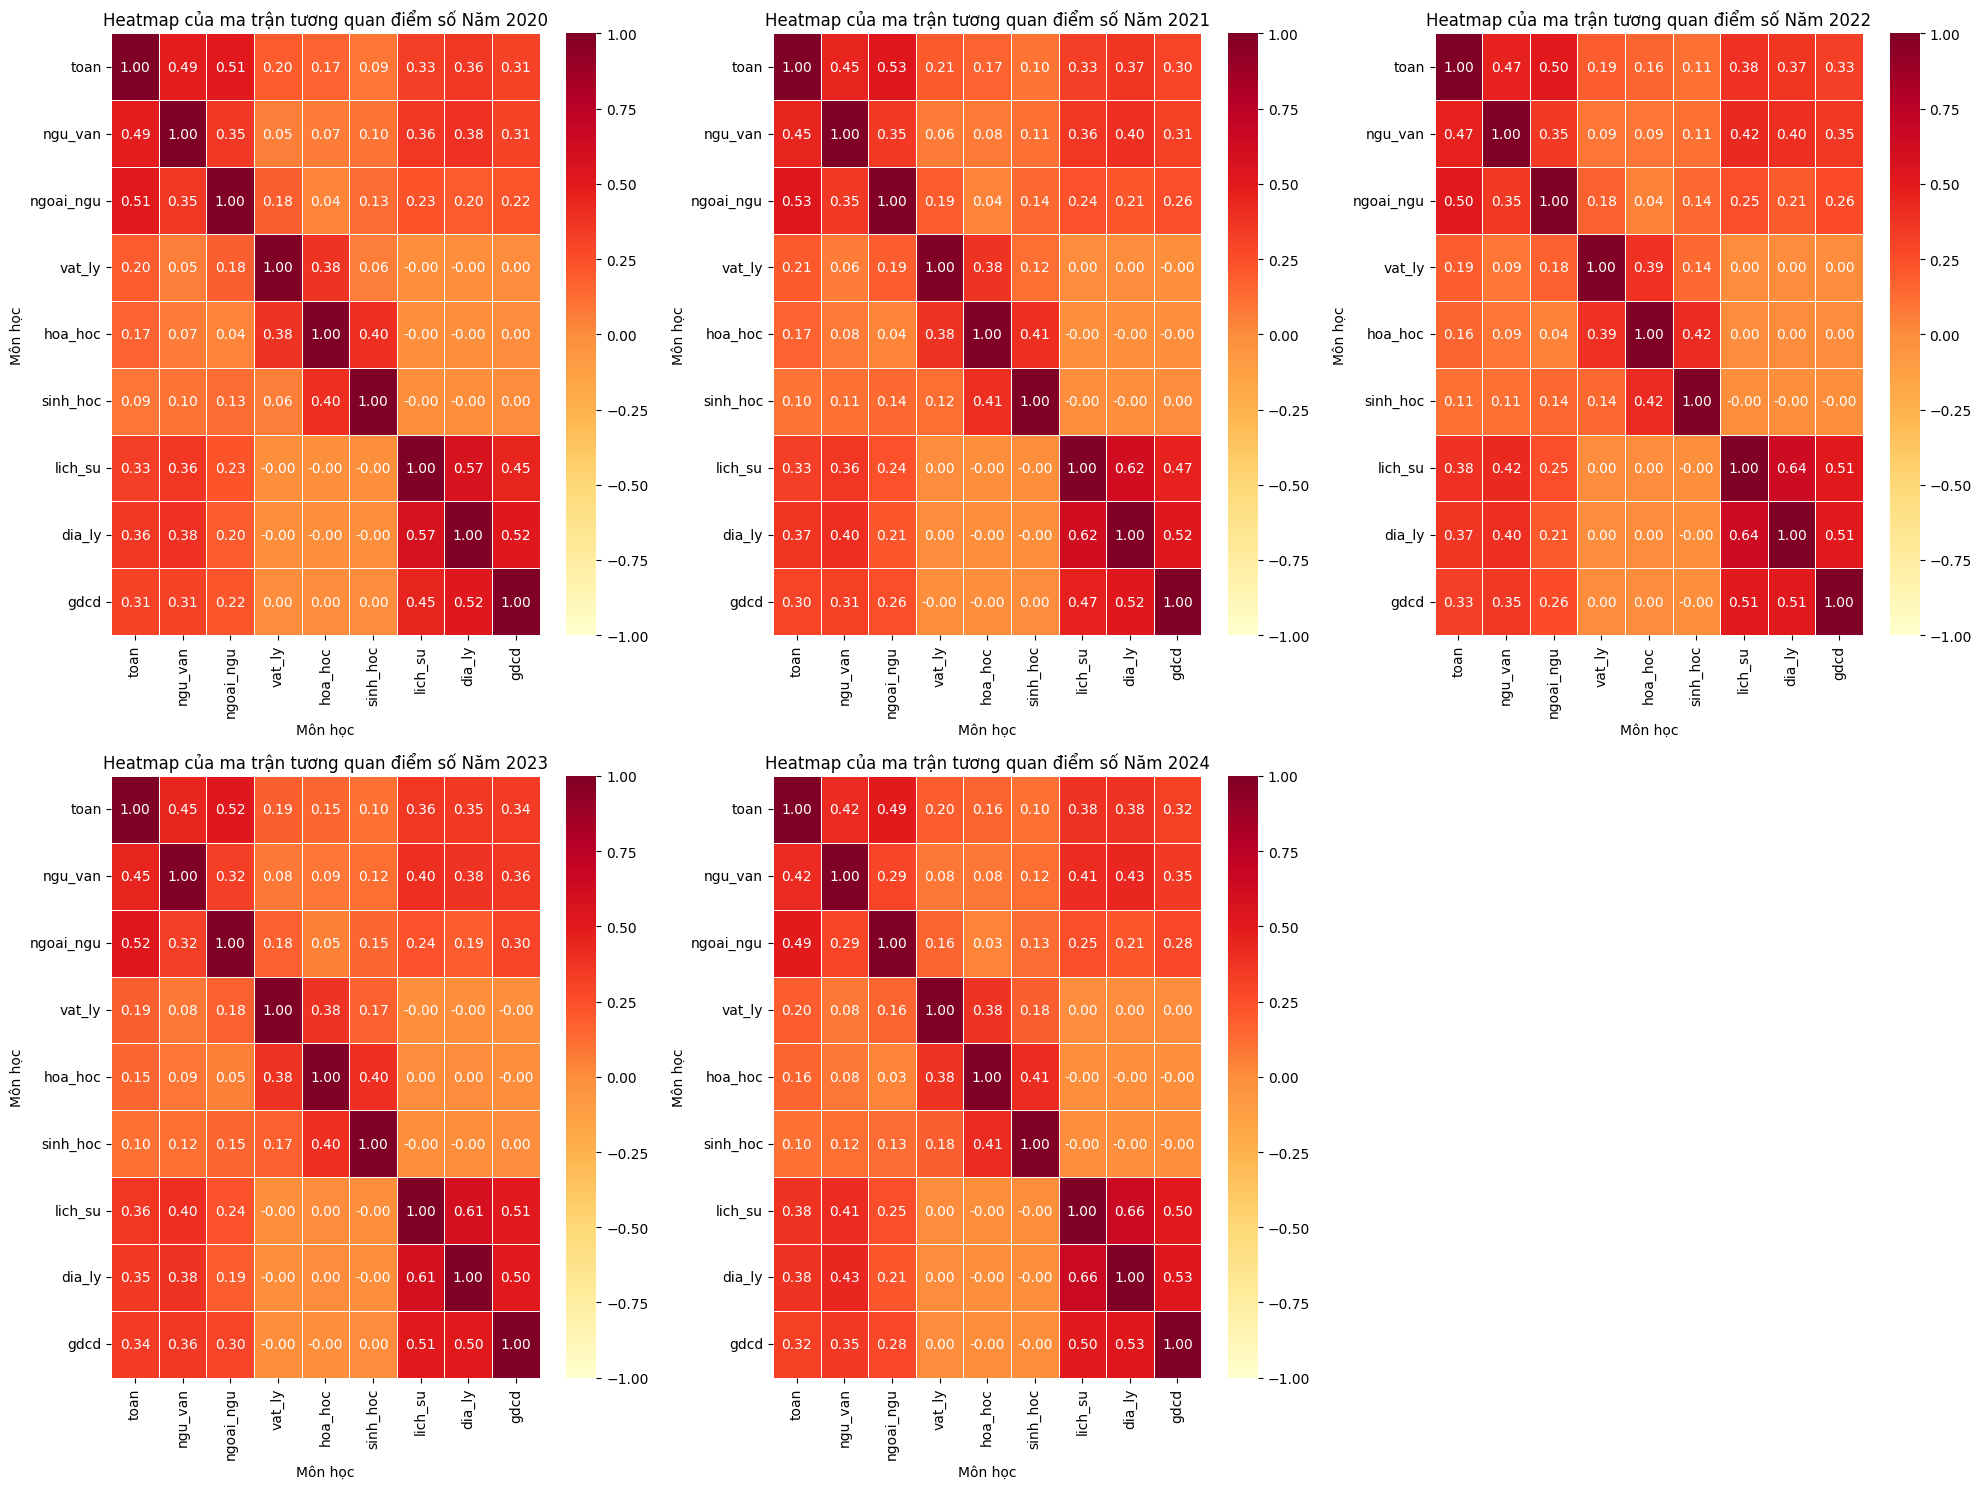

In [8]:


# Thiết lập khung hình lớn cho 5 heatmap
plt.figure(figsize=(20, 15))

# Danh sách các năm cần phân tích
years = [2020, 2021, 2022, 2023, 2024]
titles = ['Năm 2020', 'Năm 2021', 'Năm 2022', 'Năm 2023', 'Năm 2024']

# Vòng lặp qua từng năm để tạo heatmap
for i, year in enumerate(years):
    # Lấy dữ liệu cho năm tương ứng
    data = data_all[data_all['year'] == str(year)][[
        'toan', 'ngu_van', 'ngoai_ngu', 'vat_ly',
        'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_ly', 'gdcd'
    ]].copy()

    # Thay thế NaN bằng giá trị trung bình của từng cột
    data.fillna(data.mean(), inplace=True)

    # Kiểm tra các cột chỉ chứa một giá trị duy nhất (không có phương sai)
    unique_counts = data.nunique()

    # Loại bỏ các cột chỉ chứa một giá trị duy nhất
    data = data.loc[:, unique_counts > 1]

    # Kiểm tra xem dữ liệu có hợp lệ không
    if data.empty or len(data.columns) < 2:
        continue

    # Tạo subplot (2 hàng, 3 cột), chỉ sử dụng 5 ô đầu tiên
    plt.subplot(2, 3, i + 1)
    sns.heatmap(
        data.corr(),
        annot=True,
        cmap='YlOrRd',
        vmin=-1, vmax=1,
        linewidths=0.5,
        fmt=".2f"
    )

    # Thiết lập tiêu đề và nhãn
    plt.title(f'Heatmap của ma trận tương quan điểm số {titles[i]}')
    plt.xlabel('Môn học')
    plt.ylabel('Môn học')

# Điều chỉnh layout để các biểu đồ không bị chồng lấn
plt.tight_layout()
plt.show()


Tương quan giữa các khối thi

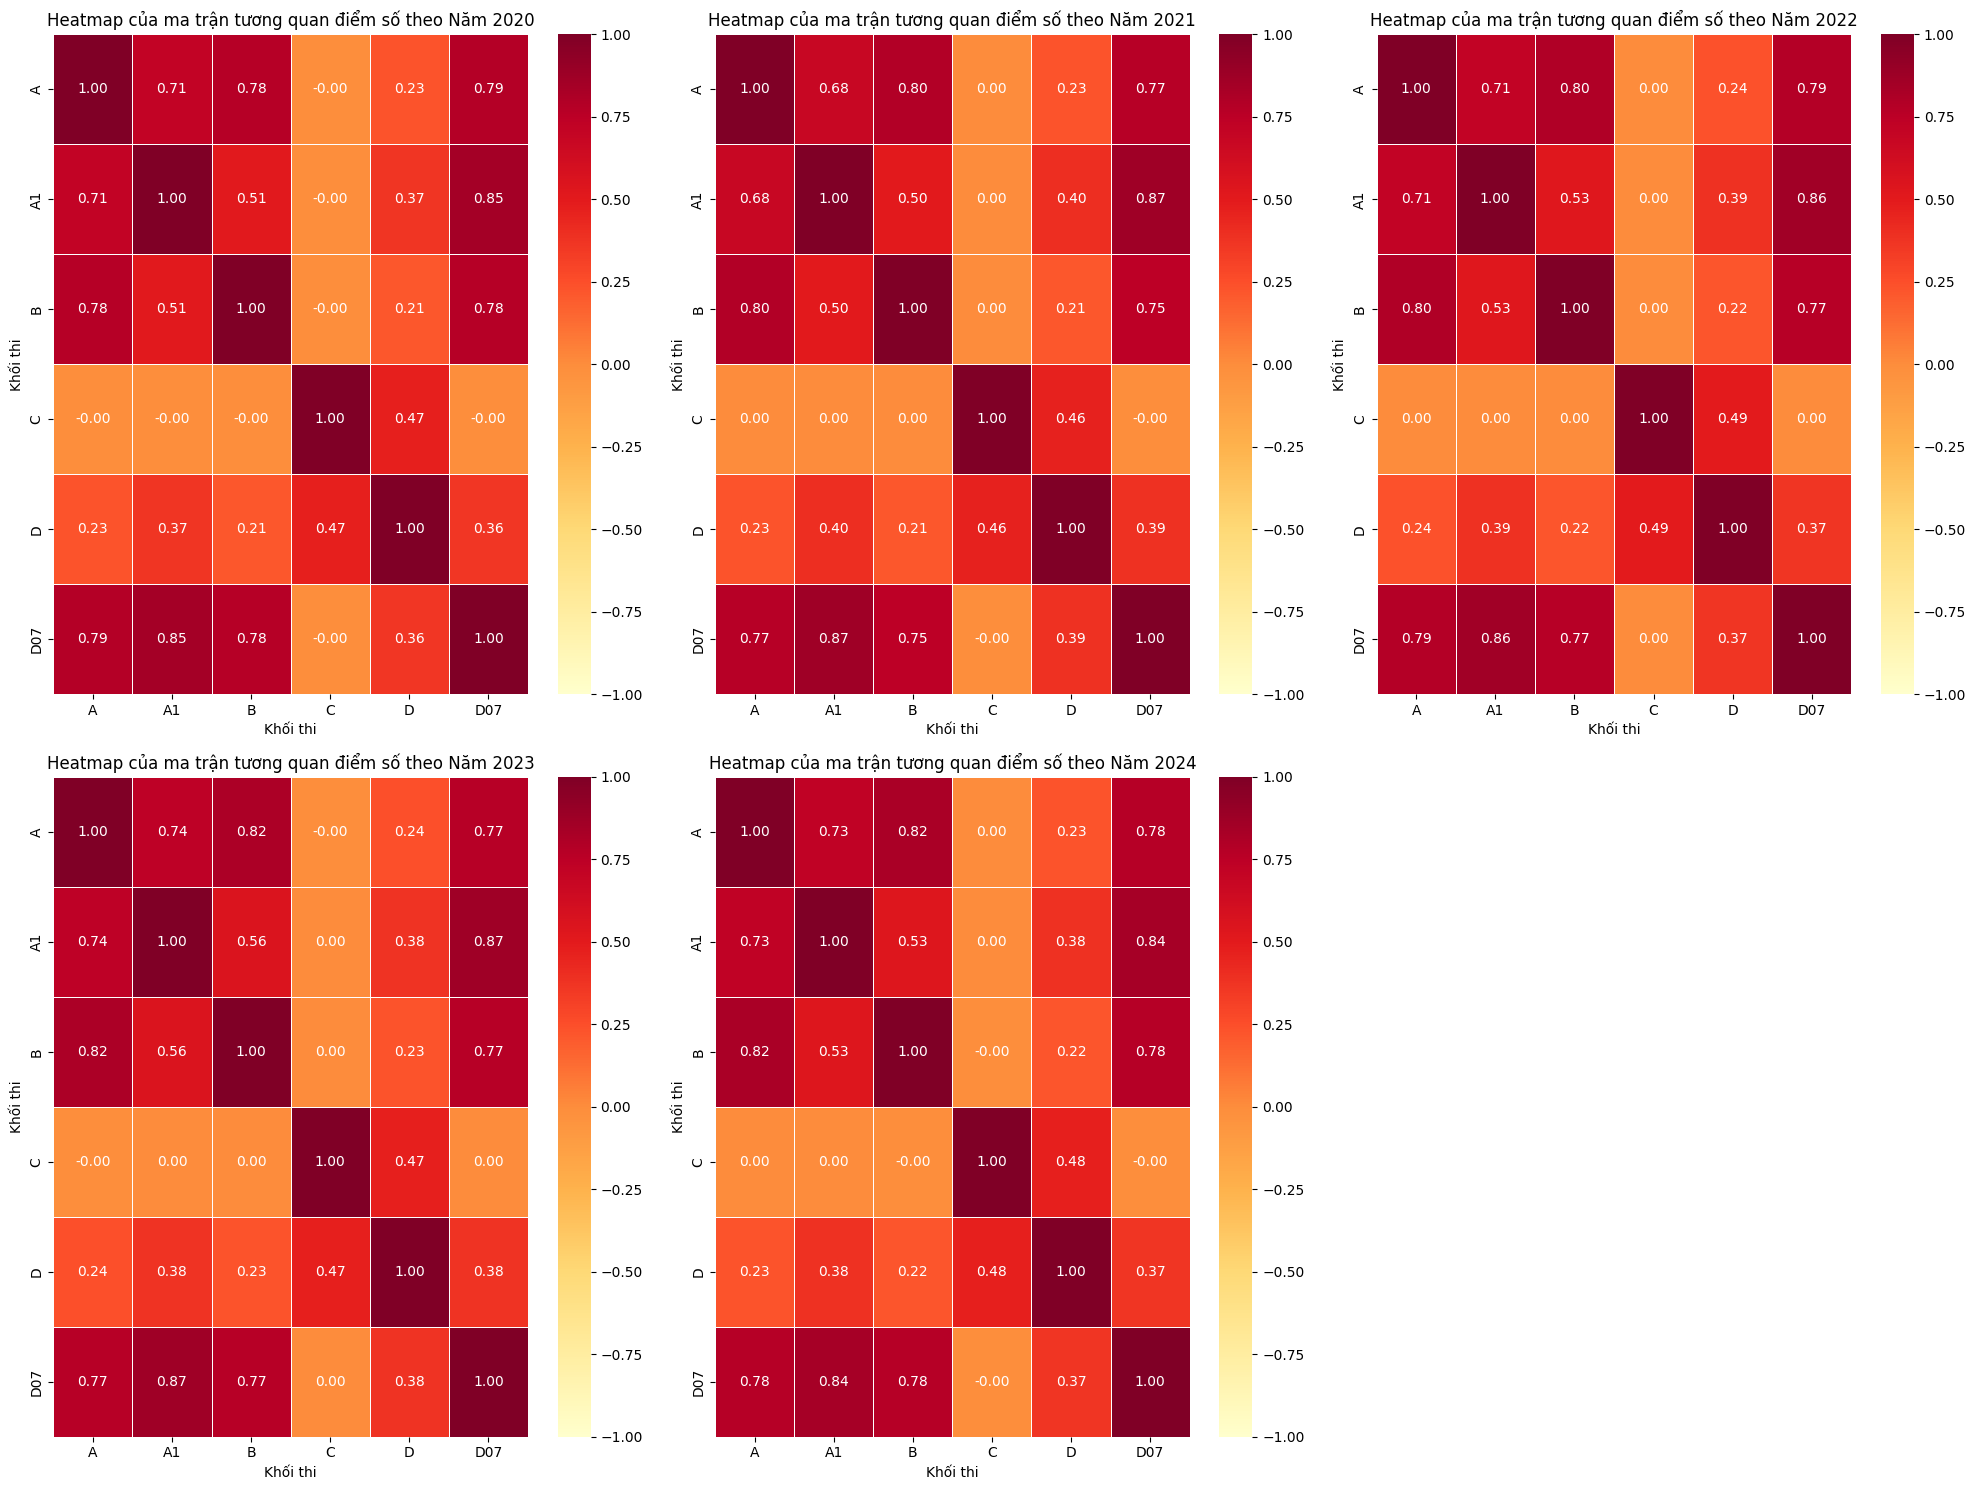

In [9]:
# Tạo cột điểm tổng hợp cho từng khối thi
data_all['A'] = data_all['toan'] + data_all['vat_ly'] + data_all['hoa_hoc']
data_all['A1'] = data_all['toan'] + data_all['vat_ly'] + data_all['ngoai_ngu']
data_all['B'] = data_all['toan'] + data_all['hoa_hoc'] + data_all['sinh_hoc']
data_all['C'] = data_all['ngu_van'] + data_all['lich_su'] + data_all['dia_ly']
data_all['D'] = data_all['toan'] + data_all['ngu_van'] + data_all['ngoai_ngu']
data_all['D07'] = data_all['toan'] + data_all['ngoai_ngu'] + data_all['hoa_hoc']
#Danh sách các năm cần phân tích
years = [2020, 2021, 2022, 2023, 2024]
titles = ['Năm 2020', 'Năm 2021', 'Năm 2022', 'Năm 2023', 'Năm 2024']

# Thiết lập khung hình lớn cho 5 heatmap
plt.figure(figsize=(20, 15))

# Vòng lặp qua từng năm để tạo heatmap
for i, year in enumerate(years):
    # Lọc dữ liệu cho năm hiện tại
    df_year = data_all[data_all['year'] == str(year)][['A', 'A1', 'B', 'C', 'D', 'D07']].copy()

    # Thay thế NaN bằng giá trị trung bình của từng cột
    df_year.fillna(df_year.mean(), inplace=True)

    # Kiểm tra các cột chỉ chứa một giá trị duy nhất (không có phương sai)
    unique_counts = df_year.nunique()

    # Loại bỏ các cột chỉ chứa một giá trị duy nhất
    df_year = df_year.loc[:, unique_counts > 1]

    # Nếu không đủ dữ liệu hoặc cột sau khi xử lý, bỏ qua heatmap
    if df_year.empty or len(df_year.columns) < 2:
        continue

    # Tạo subplot (2 hàng, 3 cột), chỉ sử dụng 5 ô đầu tiên
    plt.subplot(2, 3, i + 1)
    sns.heatmap(
        df_year.corr(),
        annot=True,
        cmap='YlOrRd',
        vmin=-1, vmax=1,
        linewidths=0.5,
        fmt=".2f"
    )

    # Thiết lập tiêu đề và nhãn
    plt.title(f'Heatmap của ma trận tương quan điểm số theo {titles[i]}')
    plt.xlabel('Khối thi')
    plt.ylabel('Khối thi')

# Điều chỉnh layout để các biểu đồ không bị chồng lấn
plt.tight_layout()
plt.show()